In [100]:
from utils import *
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

In [101]:
d_event_1 = importdphideta(0)

d_event_2 = importdphideta(1)

d_event_3 = importdphideta(2)

d_event_4 = importdphideta(3)

d_event_5 = importdphideta(4)

d_event_6 = importdphideta(5)

d_event_7 = importdphideta(6)

d_event_8 = importdphideta(7)

d_event_9 = importdphideta(8)

d_event_10 = importdphideta(9)


d_event_1to2 = pd.concat([d_event_1, d_event_2], ignore_index=True)

d_event_3to4 = pd.concat([d_event_3, d_event_4], ignore_index=True)

d_event_5to6 = pd.concat([d_event_5, d_event_6], ignore_index=True)

d_event_7to8 = pd.concat([d_event_7, d_event_8], ignore_index=True)

d_event_9to10 = pd.concat([d_event_9, d_event_10], ignore_index=True)

d_event_1to4 = pd.concat([d_event_1to2, d_event_3to4], ignore_index=True)

d_event_5to8 = pd.concat([d_event_5to6, d_event_7to8], ignore_index=True)

d_event_1to8 = pd.concat([d_event_1to4, d_event_5to8], ignore_index=True)

d_event_1to10 = pd.concat([d_event_1to8, d_event_9to10], ignore_index=True)
debug=True

In [102]:
def surfacedata(dfdata, dx = 0.5, dy = 0.5, rangex=3.15, rangey=4):
    phi_c = math.ceil(rangex*2/dx)
    eta_c = math.ceil(rangey*2/dy)
    phi_data = np.arange(-rangex, rangex, dx)+dx/2
    eta_data = np.arange(-rangey, rangey, dy)+dy/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for index,instance in dfdata.iterrows():
        if instance['phi'] >= rangex or instance['phi'] <= -rangex or instance['eta'] >= rangey or instance['eta'] <= -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dx) 
        eta_index = math.floor((instance['eta']+rangey)/dy)
        z_data[phi_index][eta_index] += 1
        if index % 1000000 == 0 and debug:
            print("at",index)
    z_data = z_data.T
    return phi_data, eta_data, z_data/sum(z_data)

In [103]:

mixed_x, mixed_y, mixed_z = surfacedata(d_event_1to10, 0.25, 0.35, 3.15, 6)

at 0


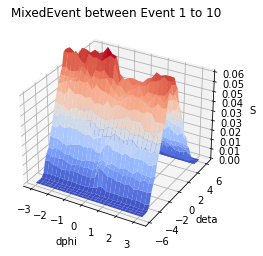

In [104]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = mixed_x
Y = mixed_y
X, Y = np.meshgrid(X, Y)
Z = mixed_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.06)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('MixedEvent between Event 1 to 10')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/SingeEvent0to49.png')
plt.show()